In [1]:
# Math Operations
import numpy as np
from math import pi

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
!pip install soccerplots
import soccerplots
from soccerplots.radar_chart import Radar   # for custom radar visuals

# Machine Learning
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Print Statement
print('All necessary libraries imported.')

All necessary libraries imported.


In [2]:
leeds_s1 = pd.read_csv("datasets\cleanedbasic\leeds20-21.csv")
leeds_s2 = pd.read_csv("datasets\cleanedbasic\leeds21-22.csv")
# hudds
hudds_s1 = pd.read_csv("datasets\cleanedbasic\hudds17-18.csv")
hudds_s2 = pd.read_csv("datasets\cleanedbasic\hudds18-19.csv")
# brighton
bri_s1 = pd.read_csv("datasets/cleanedbasic/brighton17-18.csv")
bri_s2 = pd.read_csv("datasets/cleanedbasic/brighton18-19.csv")
# newcastle
new_s1 = pd.read_csv("datasets/cleanedbasic/newcastle17-18.csv")
new_s2 = pd.read_csv("datasets/cleanedbasic/newcastle18-19.csv")
# sheff utd
sheff_s1 = pd.read_csv("datasets/cleanedbasic/sheffutd19-20.csv")
sheff_s2 = pd.read_csv("datasets/cleanedbasic/sheffutd20-21.csv")
# aston villa
villa_s1 = pd.read_csv("datasets/cleanedbasic/villa19-20.csv")
villa_s2 = pd.read_csv("datasets/cleanedbasic/villa20-21.csv")
# wolves
wolves_s1 = pd.read_csv("datasets/cleanedbasic/wolves18-19.csv")
wolves_s2 = pd.read_csv("datasets/cleanedbasic/wolves19-20.csv")

In [3]:
season_1 = [leeds_s1, hudds_s1, bri_s1, new_s1, sheff_s1, villa_s1, wolves_s1]
season_2 = [leeds_s2, hudds_s2, bri_s2, new_s2, sheff_s2, villa_s2, wolves_s2]
teams = ['Leeds United', 'Huddersfield Town', 'Brighton', 'Newcastle United', 'Sheffield United', 'Aston Villa',
        'Wolves']

In [4]:
leeds_s1.loc[leeds_s1['Player'] == 'Leeds United']

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG


In [5]:
def replace_value(dfs):
    for i in range(len(dfs)):
            dfs[i].replace({'Player': {'Squad Total': teams[i]}}, inplace = True)

In [6]:
replace_value(season_1)
replace_value(season_2)

In [9]:
for i in range(len(season_1)):
    lst = []
    for j in range(len(season_1[i])):
        lst.append('Season 1')
    #print(len(lst))
    season_1[i]['Season'] = lst

In [10]:
for i in range(len(season_2)):
    lst = []
    for j in range(len(season_2[i])):
        lst.append('Season 2')
    #print(len(lst))
    season_2[i]['Season'] = lst

In [11]:
wolves_s1.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Per90Gls', 'Per90Ast',
       'Per90G+A', 'Per90G-PK', 'Per90G+A-PK', 'xG', 'npxG', 'xA', 'npxG+xAG',
       'Per90xG', 'Per90xA', 'Per90xG+xA', 'Per90npxG', 'Per90npxG+xAG',
       'Season'],
      dtype='object')

In [12]:
all_dfs = season_1 + season_2

In [13]:
print(len(all_dfs))

14


In [37]:
def create_2p_radar(df1,df2,player_1_season,player_1_colour,player_1_team,
                    player_2_season,
                    player_2_colour,
                    player_2_team):
    
    ## Select only the players we wish to compare
    #lst_players = [player_1_name, player_2_name]

    
    ## Filter DataFrame to only have the two players of interest
    
    ### Player 1 
    df_radar_player_1 = df1.loc[df1['Player'] == player_1_team]
    
    ### Player 2 
    df_radar_player_2 = df2.loc[df2['Player'] == player_2_team]
    
    ### Union two DataFrames together
    df_radar = pd.concat([df_radar_player_1, df_radar_player_2])
    #print(df_radar)
    
    
    ## Define list of columns for radar
    lst_cols_radar = ['Player',
                      'Season',
                      'Per90xG',
                      'Gls',
                      'Per90xA',
                      'Ast',
                      'CrdY',
                      'Per90G-PK',
                     ]
    
    ## Select only columns of interest for radar
    df_radar = df_radar[lst_cols_radar]

    
    ## Rename columns
    df_radar.columns=['Team',
                      'Season',
                      'Per 90 Expected Goals',
                      'Goals Scored',
                      'Per 90 Expected Assists',
                      'Assists',
                      'Total Yellow Cards',
                      'Per 90 Goals minus Penalties',
                     ] 
    
    ## Reset index
    df_radar = df_radar.reset_index(drop=True)

    
    ## Radar visualisation
    
    ### Get parameters
    params = list(df_radar.columns)
    params = params[2:]
    
    ### Add ranges to list of tuple pairs
    ranges = []
    a_values = []
    b_values = []
    
    ###
    for x in params:
        a = min(df_radar[params][x])
        a = a - (a*.25)

        b = max(df_radar[params][x])
        b = b + (b*.25)

        ranges.append((a, b))
        #print(ranges)

    ###
    for x in range(len(df_radar['Season'])):
        if df_radar['Season'][x] == player_1_season:
            a_values = df_radar.iloc[x].values.tolist()
        if df_radar['Season'][x] == player_2_season:
            b_values = df_radar.iloc[x].values.tolist()
    
    ###
    a_values = a_values[2:]
    b_values = b_values[2:]
    #print(a_values)
    #print(b_values)

    ###
    values = [a_values, b_values]
    #print(values)

    ###
    title = dict(title_name = player_1_team,
                 title_color = player_1_colour,
                 subtitle_name = player_1_season,
                 subtitle_color = player_1_colour,
                 title_name_2 = player_2_team,
                 title_color_2 = player_2_colour,
                 subtitle_name_2 = player_2_season,
                 subtitle_color_2 = player_2_colour,
                 title_fontsize = 18,
                 subtitle_fontsize=15
                )
    
    ### Define fonts and colours
    background='#f7f7f7'    #'#313233'
    mpl.rcParams.update(mpl.rcParamsDefault)
    
    endnote = '@https://github.com/kiansweeney11'
    
    ###
    radar = Radar()

    ### Create figure
    fig, ax = radar.plot_radar(ranges=ranges,
                               params=params,
                               values=values,
                               radar_color=[player_1_colour, player_2_colour],
                               alphas=[0.5, 0.5],
                               endnote=endnote,
                               title=title,
                               compare=True)
    
    ### Change background colour
    fig.set_facecolor(background)
    return fig

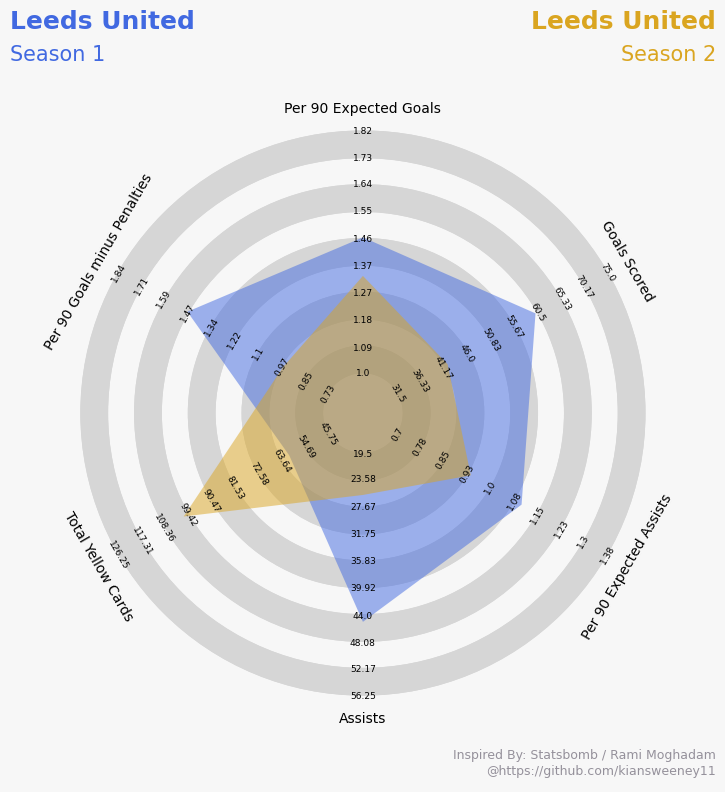

In [38]:
create_2p_radar(leeds_s1, leeds_s2, 'Season 1', 'royalblue', 'Leeds United', 'Season 2', 'goldenrod', 'Leeds United')

In [ ]:
create_2p_radar(sheff_s1, sheff_s2, 'Season 1', 'black', 'Sheffield United', 'Season 2', 'indianred', 'Sheffield United')